In [1]:

import os
import numpy as np
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import matthews_corrcoef, confusion_matrix, accuracy_score, roc_curve, auc, classification_report
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
import pickle
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# Load your data
y_binary_test = np.load("/home/basir/basir/Dataset of Ruddlesdenand popper/Data/y_binary_test.npy")
X_test = np.load("/home/basir/basir/Dataset of Ruddlesdenand popper/Data/X_test.npy")
X_train = np.load("/home/basir/basir/Dataset of Ruddlesdenand popper/Data/X_train.npy")
y_binary_train = np.load("/home/basir/basir/Dataset of Ruddlesdenand popper/Data/y_binary_train.npy")

In [3]:

# Load the final trained model
final_model_filename = "/home/basir/StackingGPC_classifier/final_model.pkl"
with open(final_model_filename, 'rb') as final_model_file:
    final_model = pickle.load(final_model_file)

Classification Report on Test:
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        19
           1       0.90      0.82      0.86        34

    accuracy                           0.83        53
   macro avg       0.82      0.83      0.82        53
weighted avg       0.84      0.83      0.83        53

Confusion Matrix on Test Set:
[[16  3]
 [ 6 28]]
Sensitivity on Test Set: 0.82
Specificity on Test Set: 0.84
MCC on Test Set: 0.65
Accuracy on Test Set: 0.83


Text(0.5, 1.0, 'Confusion Matrix on Test Set')

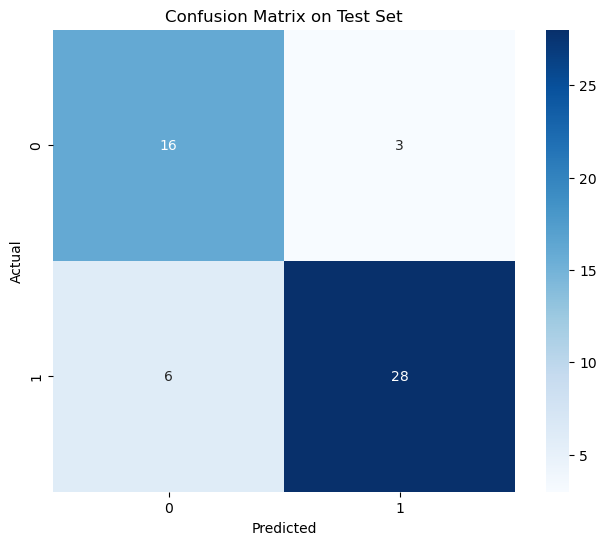

In [6]:

# Make predictions on the test dataset
y_pred_test = final_model.predict(X_test)

# Classification Report
classification_rep_test = classification_report(y_binary_test, y_pred_test)
print("Classification Report on Test:")
print(classification_rep_test)

# Calculate the predicted probabilities for class 1 on the test set
y_prob_test = final_model.predict_proba(X_test)[:, 1]

# Generate ROC curve and calculate AUC on the test set
fpr_test, tpr_test, _ = roc_curve(y_binary_test, y_prob_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Confusion Matrix on Test Set
confusion_mat_test = confusion_matrix(y_binary_test, y_pred_test)
print("Confusion Matrix on Test Set:")
print(confusion_mat_test)

# Calculate Sensitivity, Specificity, MCC, and Accuracy on Test Set
tn_test, fp_test, fn_test, tp_test = confusion_mat_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)
mcc_test = matthews_corrcoef(y_binary_test, y_pred_test)
accuracy_test = accuracy_score(y_binary_test, y_pred_test)

print(f"Sensitivity on Test Set: {sensitivity_test:.2f}")
print(f"Specificity on Test Set: {specificity_test:.2f}")
print(f"MCC on Test Set: {mcc_test:.2f}")
print(f"Accuracy on Test Set: {accuracy_test:.2f}")



plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt="d", cmap="Blues", square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Test Set')



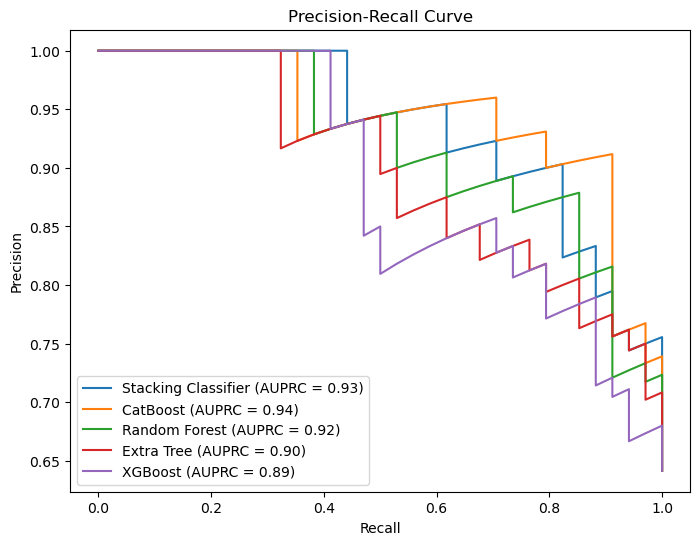

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
import pickle

# Load your data
y_binary_test = np.load("/home/basir/basir/Dataset of Ruddlesdenand popper/Data/y_binary_test.npy")
X_test = np.load("/home/basir/basir/Dataset of Ruddlesdenand popper/Data/X_test.npy")

# Define model names corresponding to model files
model_names = [
    "Stacking Classifier",
    #"LightGBM",
    "CatBoost",
    "Random Forest",
    "Extra Tree",
    "XGBoost"
    
]

# Load your saved models
model_files = [
    "/home/basir/StackingGPC_classifier/final_model.pkl",
    #"/home/basir/basir/LGBMcrudanddion/fold_models/final_modelnew.pkl",
    "/home/basir/basir/CBCcrudanddion/fold_models/final_model.pkl",
    "/home/basir/Randomact/fold_models/final_model.pkl",
    "/home/basir/ETCcrudanddion/fold_models/final_model.pkl",
    "/home/basir/basir/Xgbacta/final_model.pkl"
    
]

plt.figure(figsize=(8, 6))

for model_file, model_name in zip(model_files, model_names):
    with open(model_file, 'rb') as model_f:
        loaded_model = pickle.load(model_f)

    # Make predictions on the test data
    y_scores = loaded_model.predict_proba(X_test)[:, 1]

    # Calculate precision and recall
    precision, recall, thresholds = precision_recall_curve(y_binary_test, y_scores)

    # Calculate the area under the precision-recall curve
    auc_score = auc(recall, precision)

    # Plot precision-recall curve for each model with corresponding label
    plt.plot(recall, precision, label=f'{model_name} (AUPRC = {auc_score:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(False)
plt.show()

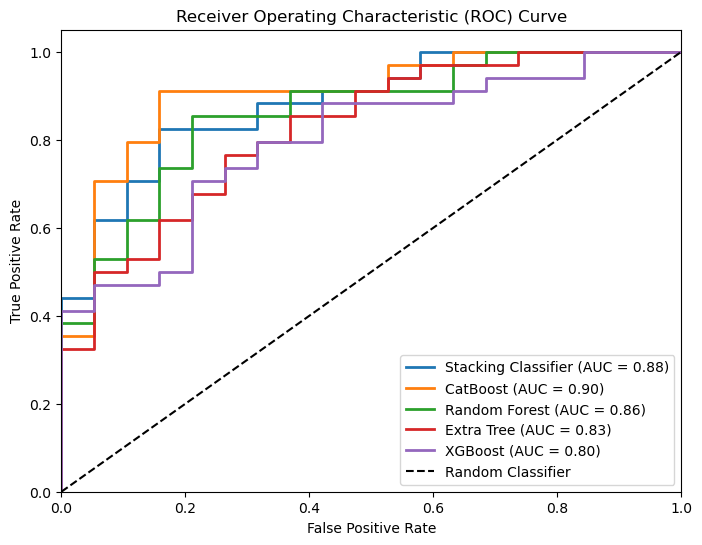

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pickle

# Load your data
y_binary_test = np.load("/home/basir/basir/Dataset of Ruddlesdenand popper/Data/y_binary_test.npy")
X_test = np.load("/home/basir/basir/Dataset of Ruddlesdenand popper/Data/X_test.npy")

# Define model names corresponding to model files
model_names = [
    "Stacking Classifier",
    "CatBoost",
    "Random Forest",
    "Extra Tree",
    "XGBoost",
    "Random Classifier"  # Add a label for the random classifier
]

# Load your saved models
model_files = [
    "/home/basir/StackingGPC_classifier/final_model.pkl",
    "/home/basir/basir/CBCcrudanddion/fold_models/final_model.pkl",
    "/home/basir/Randomact/fold_models/final_model.pkl",
    "/home/basir/ETCcrudanddion/fold_models/final_model.pkl",
    "/home/basir/basir/Xgbacta/final_model.pkl"
]

plt.figure(figsize=(8, 6))

for model_file, model_name in zip(model_files, model_names[:-1]):
    with open(model_file, 'rb') as model_f:
        loaded_model = pickle.load(model_f)

    # Make predictions on the test data
    y_scores = loaded_model.predict_proba(X_test)[:, 1]

    # Calculate false positive rate (fpr) and true positive rate (tpr)
    fpr, tpr, thresholds = roc_curve(y_binary_test, y_scores)

    # Calculate the area under the ROC curve
    auc_score = auc(fpr, tpr)

    # Plot ROC curve for each model with corresponding label
    plt.plot(fpr, tpr,lw=2, label=f'{model_name} (AUC = {auc_score:.2f})')

# Adding the straight line as a baseline
sfpr = np.linspace(0, 1, 100)
stpr = np.linspace(0, 1, 100)
plt.plot(sfpr,stpr, linestyle='--', color='black', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.grid(False)  # Remove the grid
plt.show()